In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

# 1. What are the essential sparql query features?

In [6]:
query_features = './OntoforceQueryAnalysis/ontoforce_query_features.tsv'
df_queryfeatures = pd.read_csv(query_features, sep='\t', index_col=0)
df_queryfeatures.head(n=3)

,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,tp_sp?,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
xaa,0.0,2.0,0.0,1.0,14.0,0.0,1.0,8.0,1.0,0.0,...,0.0,1.0,49.0,13.0,6.0,0.0,3.0,313.0,10373.0,5.0
xab,1.0,1.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,0.0,...,0.0,2.0,35.0,5.0,2.0,0.0,2.0,180.0,4114.0,4.0
xac,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,26.0,609.0,2.0


In [7]:
df_queryfeatures.corr()

,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,tp_sp?,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
order,1.000000,0.099864,0.879501,0.133415,0.134568,-0.000600,0.098155,0.165479,0.133415,-0.125147,...,0.004009,0.243240,0.178924,0.090768,0.091355,0.102157,0.192373,0.103570,0.100505,0.213619
filter_in,0.099864,1.000000,0.110668,0.462973,0.852027,-0.061956,0.954346,0.819562,0.462973,-0.457402,...,-0.039150,0.323128,0.858768,0.729199,0.862753,0.068048,0.943735,0.968341,0.953831,0.709716
limit,0.879501,0.110668,1.000000,0.062971,0.116818,-0.039114,0.101151,0.128834,0.062971,-0.172384,...,-0.001014,0.199467,0.178583,0.107357,0.113294,0.122551,0.173946,0.104068,0.099609,0.208427
distinct,0.133415,0.462973,0.062971,1.000000,0.614674,-0.123774,0.398294,0.646547,1.000000,-0.919935,...,-0.078211,0.646522,0.626564,0.721284,0.637704,0.238950,0.522819,0.309887,0.254906,0.761565
triplePattern,0.134568,0.852027,0.116818,0.614674,1.000000,-0.002353,0.908566,0.990151,0.614674,-0.602423,...,0.021524,0.631135,0.983567,0.950027,0.976516,0.441395,0.923059,0.789101,0.742944,0.920023
tp_?po,-0.000600,-0.061956,-0.039114,-0.123774,-0.002353,1.000000,-0.029607,0.009356,-0.123774,-0.039176,...,0.506220,0.086794,-0.028415,-0.073769,-0.084923,0.069203,-0.067174,-0.029783,-0.028811,-0.003755
union,0.098155,0.954346,0.101151,0.398294,0.908566,-0.029607,1.000000,0.873176,0.398294,-0.388687,...,-0.033277,0.376537,0.915897,0.792999,0.903413,0.297601,0.944580,0.939854,0.917531,0.750996
tp_?p?,0.165479,0.819562,0.128834,0.646547,0.990151,0.009356,0.873176,1.000000,0.646547,-0.633501,...,0.048077,0.683164,0.970388,0.934938,0.943249,0.425642,0.914961,0.746887,0.698731,0.942611
aggregation_count,0.133415,0.462973,0.062971,1.000000,0.614674,-0.123774,0.398294,0.646547,1.000000,-0.919935,...,-0.078211,0.646522,0.626564,0.721284,0.637704,0.238950,0.522819,0.309887,0.254906,0.761565
tp_sp?,-0.125147,-0.457402,-0.172384,-0.919935,-0.602423,-0.039176,-0.388687,-0.633501,-0.919935,1.000000,...,-0.016522,-0.662602,-0.620049,-0.707034,-0.628684,-0.245338,-0.499263,-0.303914,-0.248654,-0.752641


In [10]:

def plot_correlation_matrix(df, filename=None, svg=True, eps=False):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
    
    cax = ax.matshow(abs(df.corr()))
    fig.colorbar(cax)
    ticks = list(range(len(df.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(df.columns, rotation=20, horizontalalignment='left')
    ax.set_yticklabels(df.columns)

    plt.tight_layout()
    
    if filename is not None:
        if eps:
            plt.savefig(filename+'.eps', format='eps', bbox_inches='tight', dpi=1200) 
        
        if svg:
            plt.savefig(filename+'.svg', format='svg', bbox_inches='tight', dpi=1200)
        
    
    plt.show()

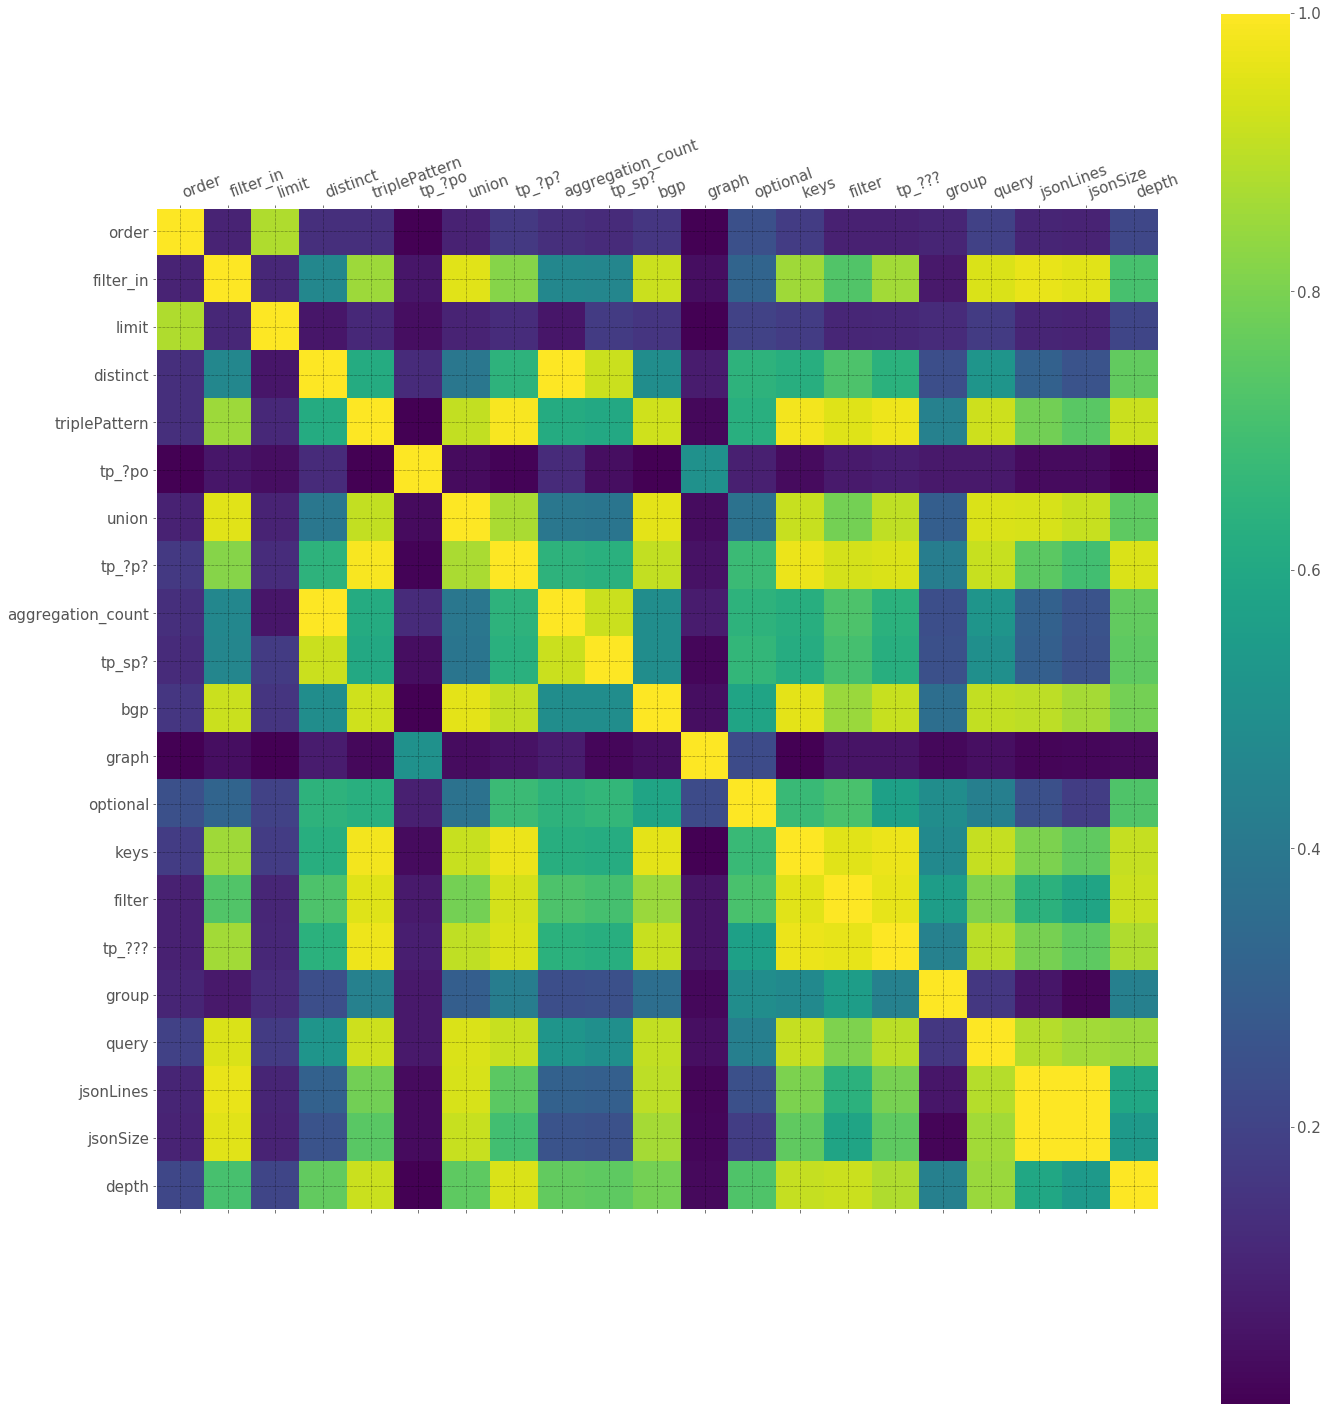

In [11]:
plot_correlation_matrix(df_queryfeatures, './img/FeatureCorrs/Sup01_AllFeatureCorrelations')

In [12]:
correlations = df_queryfeatures.corr()

In [13]:
correlations[correlations > 0.85]

,order,filter_in,limit,distinct,triplePattern,tp_?po,union,tp_?p?,aggregation_count,tp_sp?,...,graph,optional,keys,filter,tp_???,group,query,jsonLines,jsonSize,depth
order,1.000000,NaN,0.879501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
filter_in,NaN,1.000000,NaN,NaN,0.852027,NaN,0.954346,NaN,NaN,NaN,...,NaN,NaN,0.858768,NaN,0.862753,NaN,0.943735,0.968341,0.953831,NaN
limit,0.879501,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distinct,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
triplePattern,NaN,0.852027,NaN,NaN,1.000000,NaN,0.908566,0.990151,NaN,NaN,...,NaN,NaN,0.983567,0.950027,0.976516,NaN,0.923059,NaN,NaN,0.920023
tp_?po,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
union,NaN,0.954346,NaN,NaN,0.908566,NaN,1.000000,0.873176,NaN,NaN,...,NaN,NaN,0.915897,NaN,0.903413,NaN,0.944580,0.939854,0.917531,NaN
tp_?p?,NaN,NaN,NaN,NaN,0.990151,NaN,0.873176,1.000000,NaN,NaN,...,NaN,NaN,0.970388,0.934938,0.943249,NaN,0.914961,NaN,NaN,0.942611
aggregation_count,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tp_sp?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
abs(correlations['order']).sort_values(ascending=False).head(n=3)

order       1.000000
limit       0.879501
optional    0.243240
Name: order, dtype: float64

In [15]:
print('ORDER operator is almost unique but correlates with LIMT => drop the latter')
print('keep ORDER')

ORDER operator is almost unique but correlates with LIMT => drop the latter
keep ORDER


In [16]:
df_queryfeatures['order'].value_counts()

0.0    1089
1.0     134
Name: order, dtype: int64

In [17]:
abs(correlations['filter_in']).sort_values(ascending=False).head(n=8)

filter_in    1.000000
jsonLines    0.968341
union        0.954346
jsonSize     0.953831
query        0.943735
bgp          0.920234
tp_???       0.862753
keys         0.858768
Name: filter_in, dtype: float64

In [18]:
print('We can drop jsonLines and jsonSize since they are caused by the huge FILTER IN statements')
print('REVISIT: let us keep jsonSize since not there is a big different in the size of the FILTER IN statements, we will consider the log10 of the size => 0,1,2 kb')

We can drop jsonLines and jsonSize since they are caused by the huge FILTER IN statements
REVISIT: let us keep jsonSize since not there is a big different in the size of the FILTER IN statements, we will consider the log10 of the size => 0,1,2 kb


In [19]:
df_queryfeatures['filter_in'].value_counts().sort_index()

0.0     603
1.0     240
2.0     326
4.0       7
7.0       1
12.0      4
14.0     40
16.0      2
Name: filter_in, dtype: int64

In [20]:
abs(correlations['filter']).sort_values(ascending=False).head(n=8)

filter           1.000000
tp_???           0.961697
keys             0.956051
triplePattern    0.950027
tp_?p?           0.934938
depth            0.919246
bgp              0.851105
query            0.805333
Name: filter, dtype: float64

In [21]:
print('FILTER is used to bind variables, so it correlates with triple patterns, but it is not completely the same')
print('Other structural features such as keys, depth seem to correlate highyl here as well')
print('Keep FILTER and FILTER iN')

FILTER is used to bind variables, so it correlates with triple patterns, but it is not completely the same
Other structural features such as keys, depth seem to correlate highyl here as well
Keep FILTER and FILTER iN


In [22]:
df_queryfeatures['filter'].value_counts().sort_index()

0.0     591
1.0      13
2.0      32
3.0      38
4.0      28
5.0      78
6.0      54
7.0      45
8.0      29
9.0      89
10.0      1
11.0      5
12.0     49
13.0     33
15.0      4
16.0     30
17.0      2
18.0      1
19.0      7
20.0     19
22.0      5
23.0     34
24.0     13
25.0      5
26.0     13
27.0      5
Name: filter, dtype: int64

In [23]:
abs(correlations['aggregation_count']).sort_values(ascending=False).head(n=8)

distinct             1.000000
aggregation_count    1.000000
tp_sp?               0.919935
depth                0.761565
filter               0.721284
tp_?p?               0.646547
optional             0.646522
tp_???               0.637704
Name: aggregation_count, dtype: float64

In [24]:
df_queryfeatures['aggregation_count'].value_counts().sort_index()

0.0    634
1.0    589
Name: aggregation_count, dtype: int64

In [25]:
print('sp? is often part of a groupby count query, furthermore disinct usually co-occurs with count')
print('keep COUNT')

sp? is often part of a groupby count query, furthermore disinct usually co-occurs with count
keep COUNT


In [26]:
abs(correlations['triplePattern']).sort_values(ascending=False).head(n=8)

triplePattern    1.000000
tp_?p?           0.990151
keys             0.983567
tp_???           0.976516
filter           0.950027
bgp              0.929270
query            0.923059
depth            0.920023
Name: triplePattern, dtype: float64

In [27]:
df_queryfeatures['triplePattern'].value_counts().sort_index()

0.0       1
1.0     311
2.0     309
3.0      52
4.0      81
5.0      80
6.0      14
7.0       5
8.0      36
9.0      11
10.0      6
11.0    124
12.0      5
13.0      5
14.0     60
15.0      2
16.0      3
17.0     16
18.0      4
20.0     23
21.0      5
22.0      1
23.0     16
24.0      3
25.0      3
28.0      5
30.0      1
33.0     31
34.0      7
38.0      3
Name: triplePattern, dtype: int64

In [28]:
print('The majority of triple patterns are ?p?')
print('TP obviously correlates with bgp, keys, depth')
print('TP => KEEP')

The majority of triple patterns are ?p?
TP obviously correlates with bgp, keys, depth
TP => KEEP


In [29]:
abs(correlations['tp_?po']).sort_values(ascending=False).head(n=8)

tp_?po               1.000000
graph                0.506220
distinct             0.123774
aggregation_count    0.123774
optional             0.086794
tp_???               0.084923
filter               0.073769
group                0.069203
Name: tp_?po, dtype: float64

In [30]:
print('No high correlations for ?po queries')

No high correlations for ?po queries


In [31]:
abs(correlations['union']).sort_values(ascending=False).head(n=8)

union            1.000000
bgp              0.959266
filter_in        0.954346
query            0.944580
jsonLines        0.939854
jsonSize         0.917531
keys             0.915897
triplePattern    0.908566
Name: union, dtype: float64

In [32]:
print('A union is always between BGPs therefore high correlation, also union cooccurs with subqueries, but this is not entirely the same')

A union is always between BGPs therefore high correlation, also union cooccurs with subqueries, but this is not entirely the same


In [33]:
abs(correlations['graph']).sort_values(ascending=False).head(n=8)

graph                1.000000
tp_?po               0.506220
optional             0.227046
aggregation_count    0.078211
distinct             0.078211
filter               0.054632
tp_???               0.053662
tp_?p?               0.048077
Name: graph, dtype: float64

In [34]:
print('Graph is quite unique => keep')

Graph is quite unique => keep


In [35]:
df_queryfeatures['graph'].value_counts().sort_index()

0.0    1215
1.0       8
Name: graph, dtype: int64

In [36]:
abs(correlations['optional']).sort_values(ascending=False).head(n=8)

optional             1.000000
depth                0.723057
filter               0.714393
tp_?p?               0.683164
keys                 0.678609
tp_sp?               0.662602
distinct             0.646522
aggregation_count    0.646522
Name: optional, dtype: float64

In [37]:
df_queryfeatures['optional'].value_counts().sort_index()

0.0    623
1.0    282
2.0    110
3.0    151
4.0     24
5.0     22
6.0      5
7.0      3
9.0      3
Name: optional, dtype: int64

In [38]:
print('OPTIONAL has no high correlations => Keep')

OPTIONAL has no high correlations => Keep


In [39]:
abs(correlations['tp_???']).sort_values(ascending=False).head(n=8)

tp_???           1.000000
triplePattern    0.976516
keys             0.971604
filter           0.961697
tp_?p?           0.943249
bgp              0.916823
union            0.903413
query            0.895958
Name: tp_???, dtype: float64

In [40]:
print("Since this is particular to Ontoforce queryset => KEEP")

Since this is particular to Ontoforce queryset => KEEP


In [41]:
abs(correlations['group']).sort_values(ascending=False).head(n=8)

group            1.000000
filter           0.557372
optional         0.491851
keys             0.475529
triplePattern    0.441395
tp_???           0.439403
depth            0.437745
tp_?p?           0.425642
Name: group, dtype: float64

In [42]:
print('GROUP has no high correlations => Keep')

GROUP has no high correlations => Keep


In [43]:
df_queryfeatures['group'].value_counts().sort_index()

0.0    1130
2.0      34
3.0       3
4.0      56
Name: group, dtype: int64

In [44]:
abs(correlations['query']).sort_values(ascending=False).head(n=8)

query            1.000000
union            0.944580
filter_in        0.943735
triplePattern    0.923059
tp_?p?           0.914961
keys             0.911922
bgp              0.910064
tp_???           0.895958
Name: query, dtype: float64

In [45]:
print('Let us keep this one although there is a high correlation with UNION')

Let us keep this one although there is a high correlation with UNION


In [46]:
df_queryfeatures['query'].value_counts().sort_index()

1.0     813
2.0      41
3.0     283
4.0      40
9.0      36
10.0     10
Name: query, dtype: int64

In [47]:
interesting_features = ['optional', 'group', 'filter', 'filter_in', 'triplePattern', \
                        'query', 'order', 'aggregation_count', 'graph', 'jsonSize' ]

In [48]:
interesting_features

['optional',
 'group',
 'filter',
 'filter_in',
 'triplePattern',
 'query',
 'order',
 'aggregation_count',
 'graph',
 'jsonSize']

In [49]:
corr_minimal = correlations[interesting_features].loc[interesting_features]

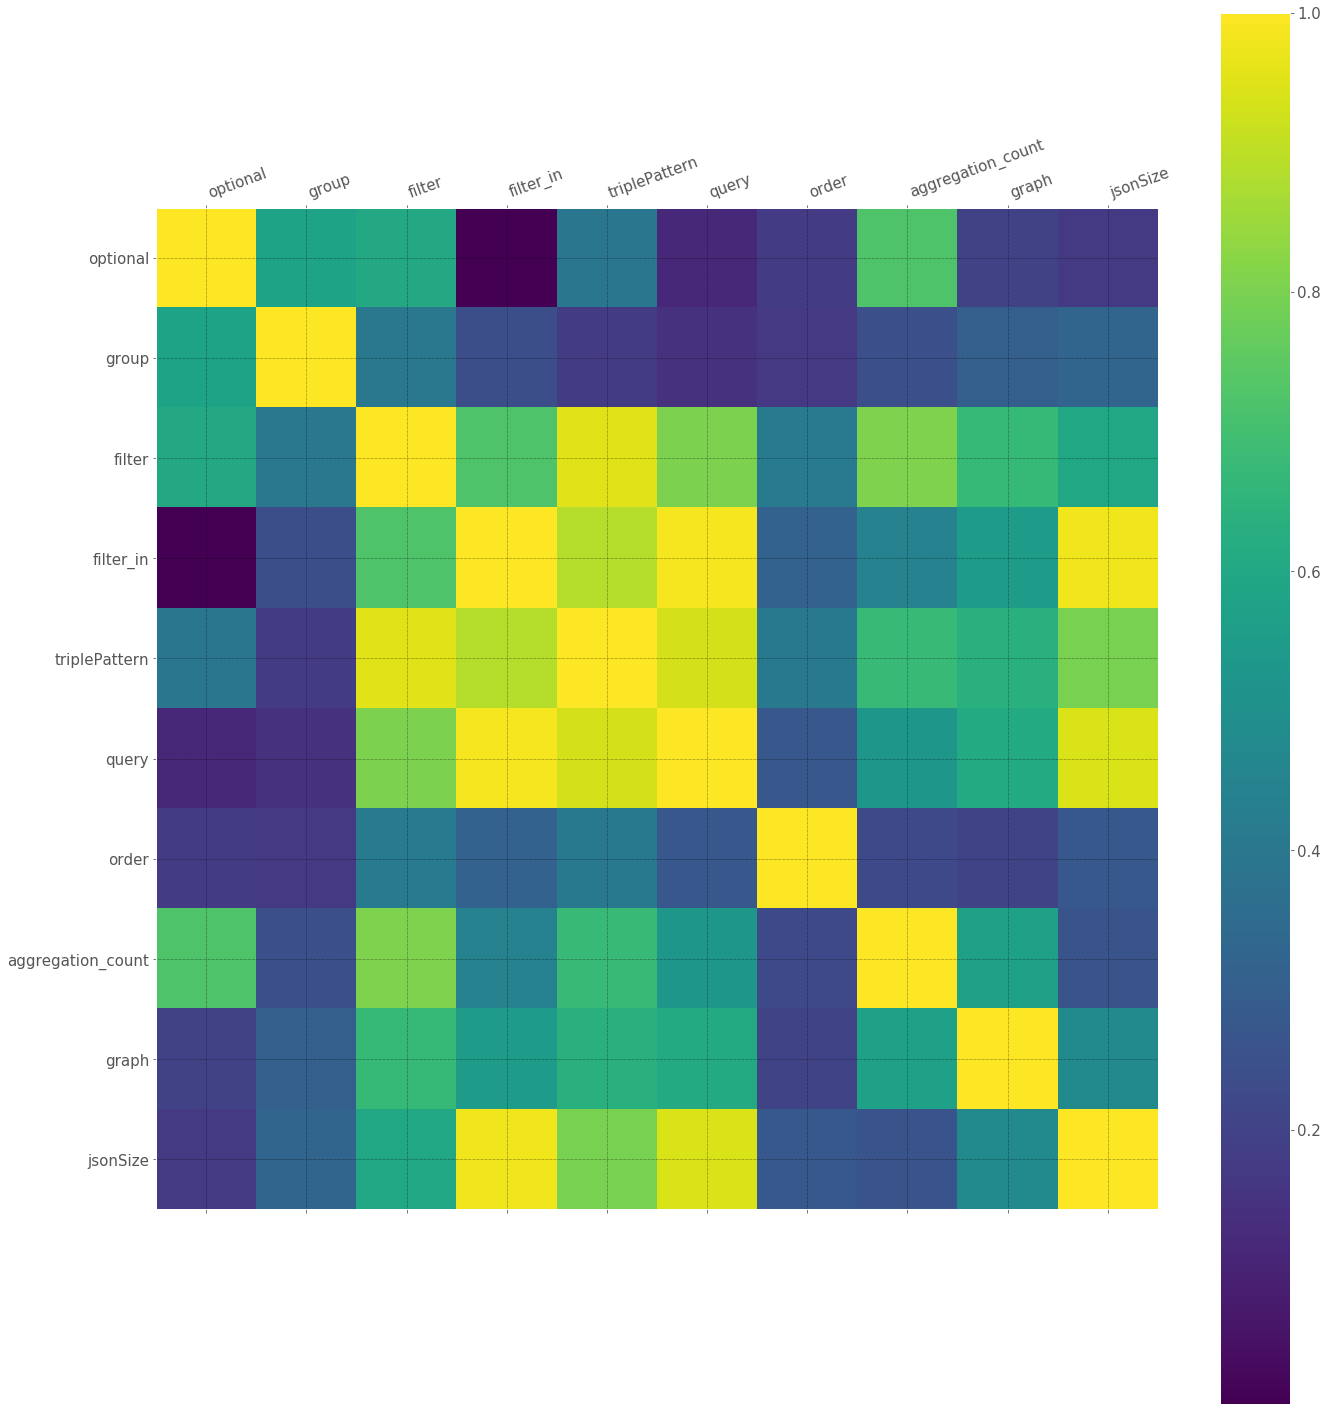

In [50]:
plot_correlation_matrix(corr_minimal, './img/FeatureCorrs/Sup02_EssentialFeatureCorrelations')